In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
DATA_PATH = 'names/'

In [5]:
names_by_year = {}
for year in range(1900, 2000):
    names_by_year[year] = pd.read_csv(
        DATA_PATH + 'yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [6]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

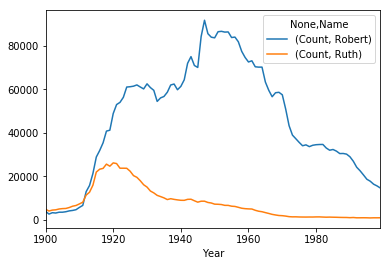

In [7]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

In [8]:
names_by_year = {}
for year in range(1900, 2005,5):    
    names_by_year[year] = pd.read_csv(
        DATA_PATH + 'yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [78]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics

Count
Year Name           
1900 Aaron       103
     Abbie       112
     Abby          7
     Abe          56
     Abel         15
     Abigail      14
     Abner        21
     Abraham     100
     Abram        18
     Abron         5
     Ace           8
     Acie         10
     Acy           6
     Ada        1101
     Adabelle      5
     Adah         37
     Adaline      18
     Adam        111
     Adda         10
     Addie       551
     Addison      11
     Adel          8
     Adela        38
     Adelaida      8
     Adelaide    183
     Adelard       6
     Adelbert      7
     Adele       186
     Adelia       50
     Adelina      19
...              ...
2000 Zyanna       17
     Zyanne       12
     Zyanya       15
     Zyaria        7
     Zyasia       20
     Zyier         5
     Zyion        11
     Zykee         6
     Zykeia        5
     Zykeith       7
     Zykeria      54
     Zykeriah      5
     Zykerria     12
     Zykia        38
     Zykiera       5
     Zykira       10
     Zyla         10
     Zyler        13
     Zymir         8
     Zynia        11
     Zyniah        7
     Zyon         78
     Zyonna        5
     Zyquan       13
     Zyra          5
     Zyria        21
     Zyron        12
     Zyshaun       6
     Zyshawn      10
     Zyshonne     17

[251066 rows x 1 columns]

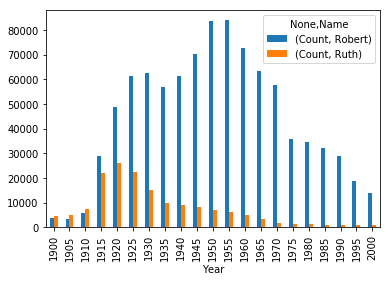

In [81]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()


In [68]:
names_dynamics = names_all.groupby([names_all.index.get_level_values(0)]).sum()
names_dynamics

,Count
Year,
1900,450296
1905,423937
1910,590717
1915,1832472
1920,2262705
1925,2333334
1930,2223111
1935,2089571
1940,2302361


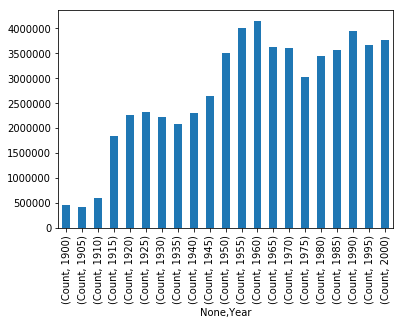

In [10]:
names_dynamics.unstack('Year').plot.bar()

In [11]:
names_50th = pd.read_csv(DATA_PATH + 'yob{}.txt'.format('1950'),names=['Name','Gender','Count'])

In [65]:
names_for_pie = names_50th.groupby('Name').sum().sort_values(by='Count', ascending=False).reset_index()

In [66]:
name_start_r = names_for_pie[names_for_pie['Name'].str.startswith('R')].head(10)

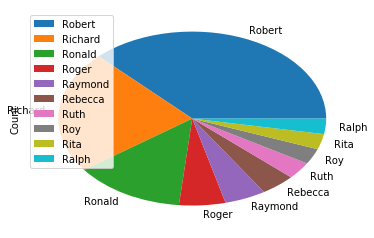

In [67]:
name_start_r.plot.pie(labels=name_start_r.Name,y='Count')

In [282]:
names_by_year = {}
for year in range(1900, 2000):
    names_by_year[year] = pd.read_csv(
        DATA_PATH + 'yob{}.txt'.format(year),
        names=['Name','Gender','Count']
        
    )
names_all = pd.concat(names_by_year,names=['Year', 'Pos'],ignore_index=True)  

In [283]:
name_dynamics = names_all.groupby('Name', as_index=False).sum()

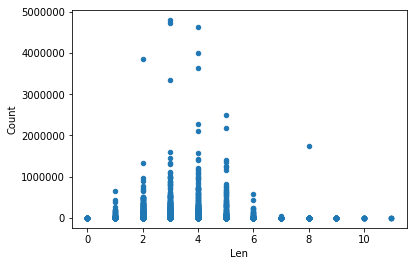

In [284]:
name_dynamics['Len'] = name_dynamics.apply(lambda row: sum(ltr in "bcdfghjklmnpqrstvwxzBCDFGHJKLMNPQRSTVWXZ" for ltr in row.Name), axis=1)
name_dynamics.plot.scatter(x='Len', y='Count')
